<a href="https://colab.research.google.com/github/Kurnosenko/-/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Этот код использует библиотеку Pandas для чтения двух CSV файлов: train.csv и test.csv, которые расположены по указанному пути /content/drive/MyDrive/.
#Затем он объединяет данные из этих двух файлов в один общий DataFrame df с помощью функции pd.concat().

df_test.head() используется для вывода первых нескольких строк из DataFrame df_test, чтобы посмотреть, что находится в этом DataFrame.

import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
df = pd.concat([df_test, df_train])
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(df.shape)
df.drop_duplicates()
print(df.shape)

(1309, 12)
(1309, 12)


In [ ]:
df.isnull().sum ()/ len(df)* 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
Survived       31.932773
dtype: float64

In [ ]:
#Этот код выполняет следующие действия:
#1. Удаляет столбцы 'Cabin', 'PassengerId', 'Ticket', 'Name' из DataFrame df_test и df_train.
#2. Преобразует категориальные признаки 'Embarked' в этих DataFrame в бинарные с помощью метода get_dummies.
#3. Кодирует категориальный признак 'Sex' с помощью LabelEncoder, преобразуя его в числовой формат.
#4. Наконец, выводится форма (количество строк и столбцов) DataFrame df_train.
#Таким образом, код подготавливает данные для обучения модели машинного обучения, выполняя предварительную обработку и кодирование категориальных признаков.
from sklearn import preprocessing
df_test = df_test.drop(columns=['Cabin', 'PassengerId', 'Ticket', "Name"])
df_train = df_train.drop(columns=['Cabin', 'PassengerId', 'Ticket', "Name"])
df_test = pd.get_dummies(df_test, columns = ['Embarked'])
df_train = pd.get_dummies(df_train, columns = ['Embarked'])
label_encoder = preprocessing.LabelEncoder()
df_test['Sex']= label_encoder.fit_transform(df_test['Sex'])
df_train['Sex']= label_encoder.fit_transform(df_train['Sex'])
print(df_train.shape)

(891, 10)


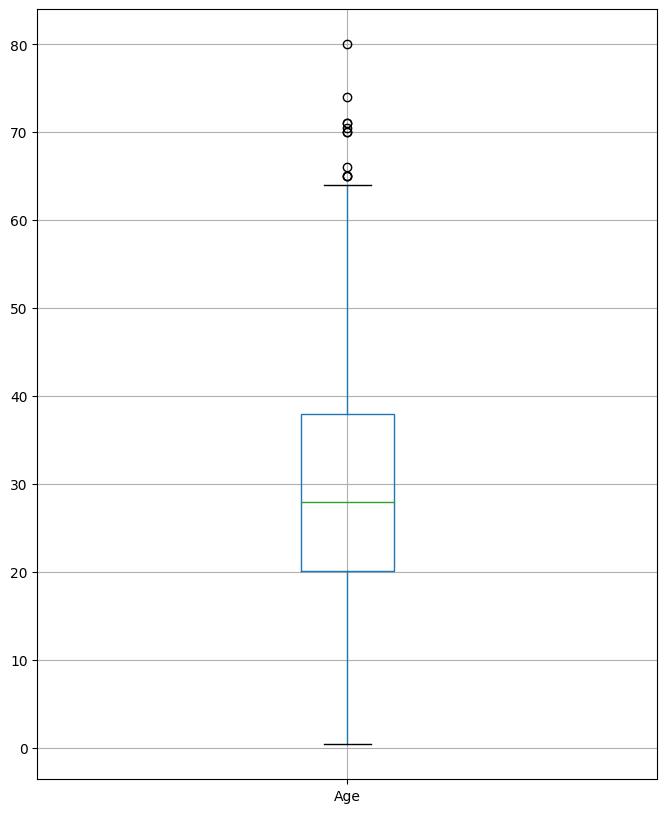

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,0.168240,-0.243292,-0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.125722,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


In [ ]:
#Матрица корреляции показывает, насколько связаны между собой различные числовые переменные.
#Коэффициент корреляции близкий к 1 означает положительную корреляцию, к -1 - отрицательную корреляцию, и близкий к 0 - отсутствие корреляции.
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(8, 10))
df_train.boxplot(column=['Age'])
plt.show()
df_train.corr()

In [ ]:
import numpy as np
print(df_train.shape)
df_train['Age'] = np.where(df_train['Age'] > 64, np.nan, df_train['Age'])


(891, 10)


In [ ]:
#В этом коде происходит следующее:
#1. Импортируется модуль LinearRegression из библиотеки sklearn.linear_model.
#2. Создается переменная train, которой присваивается DataFrame df_train.
#3. В столбце 'Age' в DataFrame train заменяются все пропущенные значения на медиану возраста.
#4. Удаляются строки, содержащие пропущенные значения в DataFrame train.
#5. Создается переменная X, в которую записываются признаки для обучения модели, исключая столбцы 'Age', 'Sex' и бинарные столбцы 'Embarked'.
#6. Создается переменная y, в которую записываются целевые значения 'Age'.
#7. Обучается модель линейной регрессии lnreg, используя обучающие данные X и целевые значения y.
#8. Выводится коэффициент детерминации (R^2) модели для обучающих данных.
#Таким образом, этот код использует линейную регрессию для предсказания возраста на основе других признаков из обучающего набора данных, а затем оценивает качество модели с помощью коэффициента детерминации.
from sklearn.linear_model import LinearRegression
train = df_train
train.Age = train.Age.replace(np.nan, train.Age.median())
train = train.dropna()
X = train.drop(columns=['Age', 'Sex' , 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived'])
y = train['Age']
lnreg = LinearRegression().fit(X, y)
lnreg.score(X, y)

0.1618048206117707

In [ ]:
#удаляем столбцы 'Age', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S' из набора данных X_test.
#2. Затем заполняем отсутствующие значения в столбце 'Fare' медианным значением этого столбца.
#3. Следующий шаг - применение обученной модели lnreg для предсказания значений 'Age' на основе признаков из X_test.
#4. Наконец, выводится последние строки измененного тестового набора данных df_test.
X_test = df_test.drop(columns=['Age', 'Sex' , 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
X_test.Fare = X_test.Fare.replace(np.nan, X_test.Fare.median())
df_test.Age = lnreg.predict(X_test)
df_test.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
413,3,1,27.118981,0,0,8.0500,False,False,True
414,1,0,36.111026,0,0,108.9000,True,False,False
415,3,1,27.125408,0,0,7.2500,False,False,True
416,3,1,27.118981,0,0,8.0500,False,False,True
417,3,1,23.816936,1,1,22.3583,True,False,False


In [ ]:
#Первая строка кода выводит процентное содержание пропущенных значений в каждом столбце набора данных df_train. Это позволяет оценить долю отсутствующих данных в каждом столбце от общего числа строк в наборе данных.
# Вторая строка кода выводит форму набора данных df_train, то есть количество строк и столбцов в нем.
print(df_train.isnull().sum ()/ len(df)* 100)
print(df_train.shape)

Survived      0.0
Pclass        0.0
Sex           0.0
Age           0.0
SibSp         0.0
Parch         0.0
Fare          0.0
Embarked_C    0.0
Embarked_Q    0.0
Embarked_S    0.0
dtype: float64
(891, 10)


In [ ]:
#этот код обучает модель логистической регрессии на обучающих данных, оценивает её точность и предсказывает выживаемость пассажиров на тестовых данных.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_train.drop(columns=['Survived'])
y = df_train['Survived']
clf = LogisticRegression(random_state=0).fit(X, y)
Predict_Model = clf.predict(X)
Real_data = df_train.Survived
print(clf.score(X, y))
print(accuracy_score(Predict_Model, Real_data))

X_test = df_test
X_test.Fare = X_test.Fare.replace(np.nan, X_test.Fare.median())
df_test.Survived = clf.predict(X_test)
df_test.Fare = X_test.Fare

0.7991021324354658
0.7991021324354658


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df = pd.concat([df_train, df_test])
df.tail(1000)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
309,1.0,1,0,30.000000,0,0,56.9292,True,False,False
310,1.0,1,0,24.000000,0,0,83.1583,True,False,False
311,1.0,1,0,18.000000,2,2,262.3750,True,False,False
312,0.0,2,0,26.000000,1,1,26.0000,False,False,True
313,0.0,3,1,28.000000,0,0,7.8958,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,27.118981,0,0,8.0500,False,False,True
414,NaN,1,0,36.111026,0,0,108.9000,True,False,False
415,NaN,3,1,27.125408,0,0,7.2500,False,False,True
416,NaN,3,1,27.118981,0,0,8.0500,False,False,True
